In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weather_data.csv')

In [3]:
df

,altitud,dir,fecha,horaPresMax,horaPresMin,horaracha,horatmax,horatmin,indicativo,nombre,prec,presMax,presMin,provincia,racha,sol,tmax,tmed,tmin,velmedia
0,52.0,7.0,2012-03-01,11,Varias,15:20,11:00,07:40,1111X,SANTANDER,0.0,1017.3,1015.6,CANTABRIA,7.5,9.1,13.4,11.0,8.6,4.2
1,52.0,28.0,2012-03-02,23,14,17:30,15:00,03:00,1111X,SANTANDER,0.0,1019.3,1015.6,CANTABRIA,7.8,3.5,12.6,10.8,9.1,3.3
2,52.0,99.0,2012-03-03,17,04,13:40,12:00,06:00,1111X,SANTANDER,0.8,1021.3,1017.8,CANTABRIA,7.2,6.8,17.8,13.7,9.6,2.5
3,52.0,33.0,2012-03-04,24,07,14:10,11:30,23:59,1111X,SANTANDER,0.8,1026.9,1015.3,CANTABRIA,18.3,1.2,15.6,12.0,8.4,6.4
4,52.0,33.0,2012-03-04,24,07,14:10,11:30,23:59,1111X,SANTANDER,0.8,1026.9,1015.3,CANTABRIA,18.3,1.2,15.6,12.0,8.4,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,52.0,9.0,2016-12-27,00,15,07:20,13:10,23:50,1111X,SANTANDER,0.0,1028.0,1025.0,CANTABRIA,13.9,5.8,12.9,10.8,8.6,6.9
1822,52.0,27.0,2016-12-28,Varias,05,12:00,12:10,07:40,1111X,SANTANDER,0.0,1028.2,1025.6,CANTABRIA,5.3,5.6,13.9,11.1,8.3,2.8
1823,52.0,99.0,2016-12-29,24,14,Varias,13:40,Varias,1111X,SANTANDER,0.0,1028.9,1027.4,CANTABRIA,5.3,0.0,11.5,10.0,8.4,2.5
1824,52.0,8.0,2016-12-30,10,16,13:10,13:10,06:50,1111X,SANTANDER,0.0,1029.3,1025.8,CANTABRIA,7.8,2.7,11.2,9.5,7.8,4.2


In [10]:
print(df.shape)
df.info()


(1826, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   altitud      1826 non-null   float64
 1   dir          1778 non-null   float64
 2   fecha        1826 non-null   object 
 3   horaPresMax  1825 non-null   object 
 4   horaPresMin  1825 non-null   object 
 5   horaracha    1778 non-null   object 
 6   horatmax     1826 non-null   object 
 7   horatmin     1826 non-null   object 
 8   indicativo   1826 non-null   object 
 9   nombre       1826 non-null   object 
 10  prec         1811 non-null   float64
 11  presMax      1825 non-null   float64
 12  presMin      1825 non-null   float64
 13  provincia    1826 non-null   object 
 14  racha        1778 non-null   float64
 15  sol          1819 non-null   float64
 16  tmax         1826 non-null   float64
 17  tmed         1826 non-null   float64
 18  tmin         1826 non-null   float64


se eliminan los datos que estan vacios en la tabla 

In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1757 entries, 0 to 1825
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   altitud      1757 non-null   float64
 1   dir          1757 non-null   float64
 2   fecha        1757 non-null   object 
 3   horaPresMax  1757 non-null   object 
 4   horaPresMin  1757 non-null   object 
 5   horaracha    1757 non-null   object 
 6   horatmax     1757 non-null   object 
 7   horatmin     1757 non-null   object 
 8   indicativo   1757 non-null   object 
 9   nombre       1757 non-null   object 
 10  prec         1757 non-null   float64
 11  presMax      1757 non-null   float64
 12  presMin      1757 non-null   float64
 13  provincia    1757 non-null   object 
 14  racha        1757 non-null   float64
 15  sol          1757 non-null   float64
 16  tmax         1757 non-null   float64
 17  tmed         1757 non-null   float64
 18  tmin         1757 non-null   float64
 19  velmedia   

In [21]:

for i in df.columns:
    cant = df[i].nunique()
    if cant == 1:
        df.drop(i, axis=1, inplace=True)

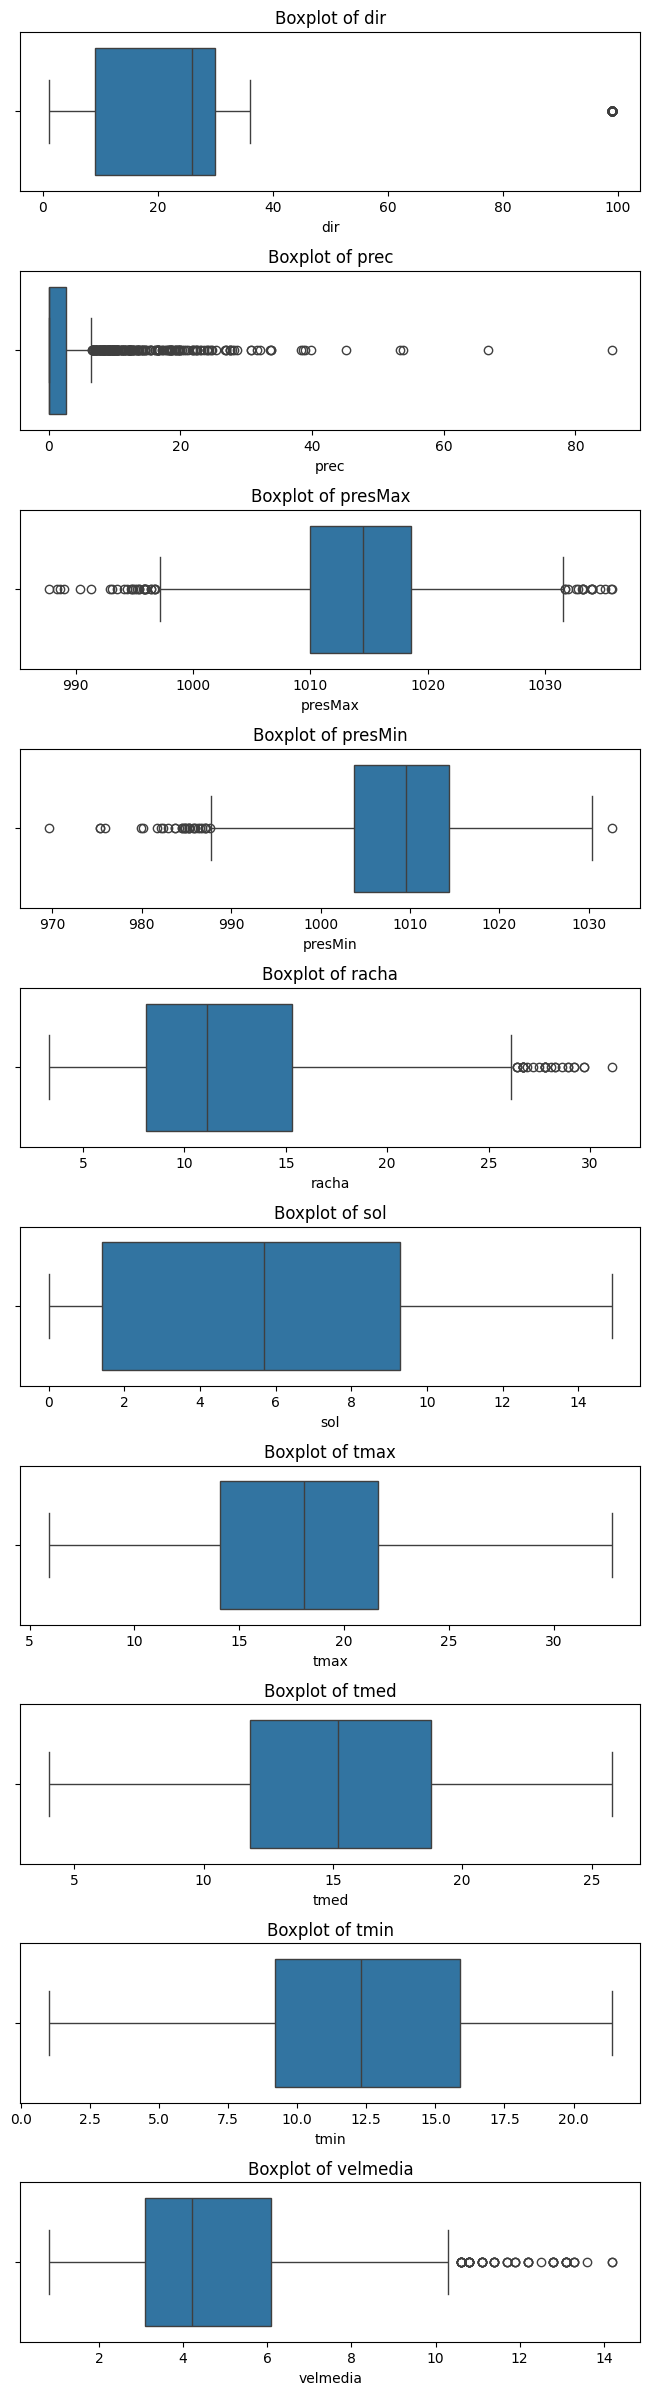

In [23]:
cols_num = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(f'Boxplot of {col}')

plt.show()

In [24]:
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y-%m-%d")

In [27]:
# Temperatura media del período registrado
temp_media = df["tmed"].mean()
print(f"Temperatura media del período registrado: {temp_media:.2f}°C")

# Temperatura máxima y la fecha en la que ocurrió
temp_max = df["tmax"].max()
fecha_temp_max = df.loc[df["tmax"].idxmax(), "fecha"]
print(f"Temperatura máxima: {temp_max}°C, Fecha: {fecha_temp_max}")

# Temperatura mínima y la fecha en la que ocurrió
temp_min = df["tmin"].min()
fecha_temp_min = df.loc[df["tmin"].idxmin(), "fecha"]
print(f"Temperatura mínima: {temp_min}°C, Fecha: {fecha_temp_min}")

# Rango de temperatura (máxima - mínima)
rango_temp = temp_max - temp_min
print(f"Rango de temperatura: {rango_temp}°C")

Temperatura media del período registrado: 15.20°C
Temperatura máxima: 32.8°C, Fecha: 2012-06-27 00:00:00
Temperatura mínima: 1.0°C, Fecha: 2015-02-04 00:00:00
Rango de temperatura: 31.799999999999997°C


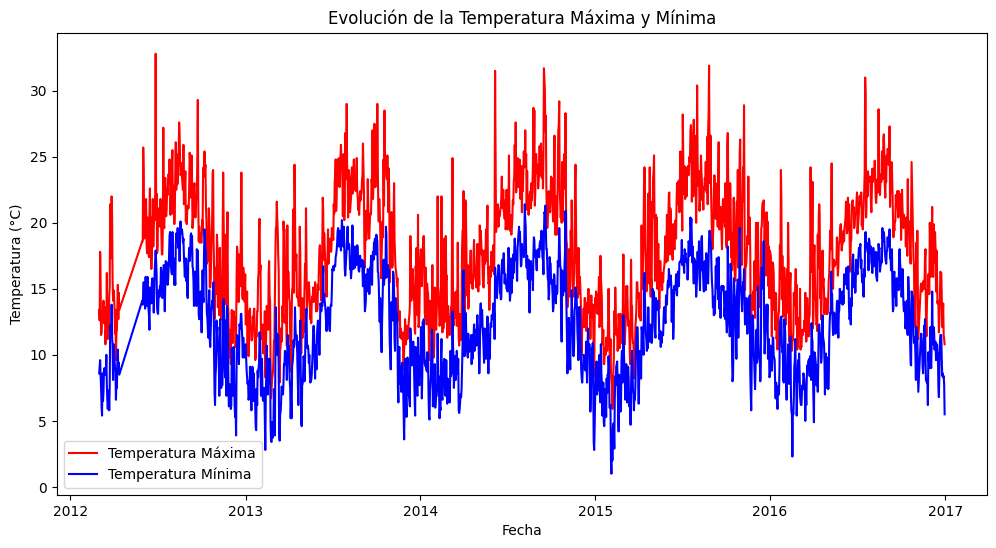

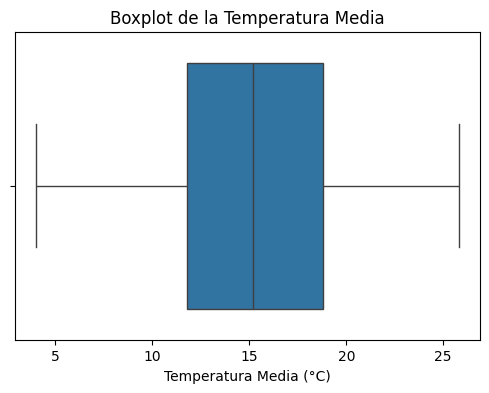

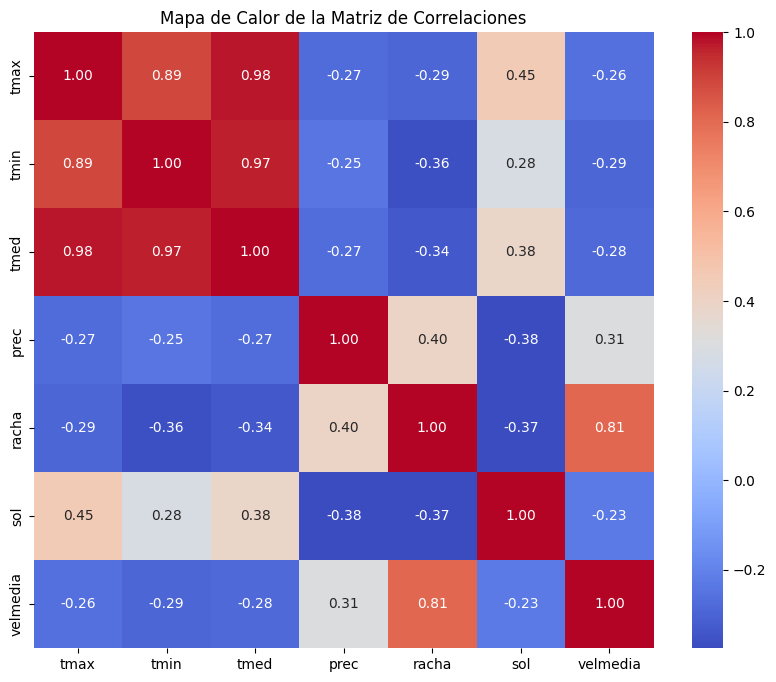

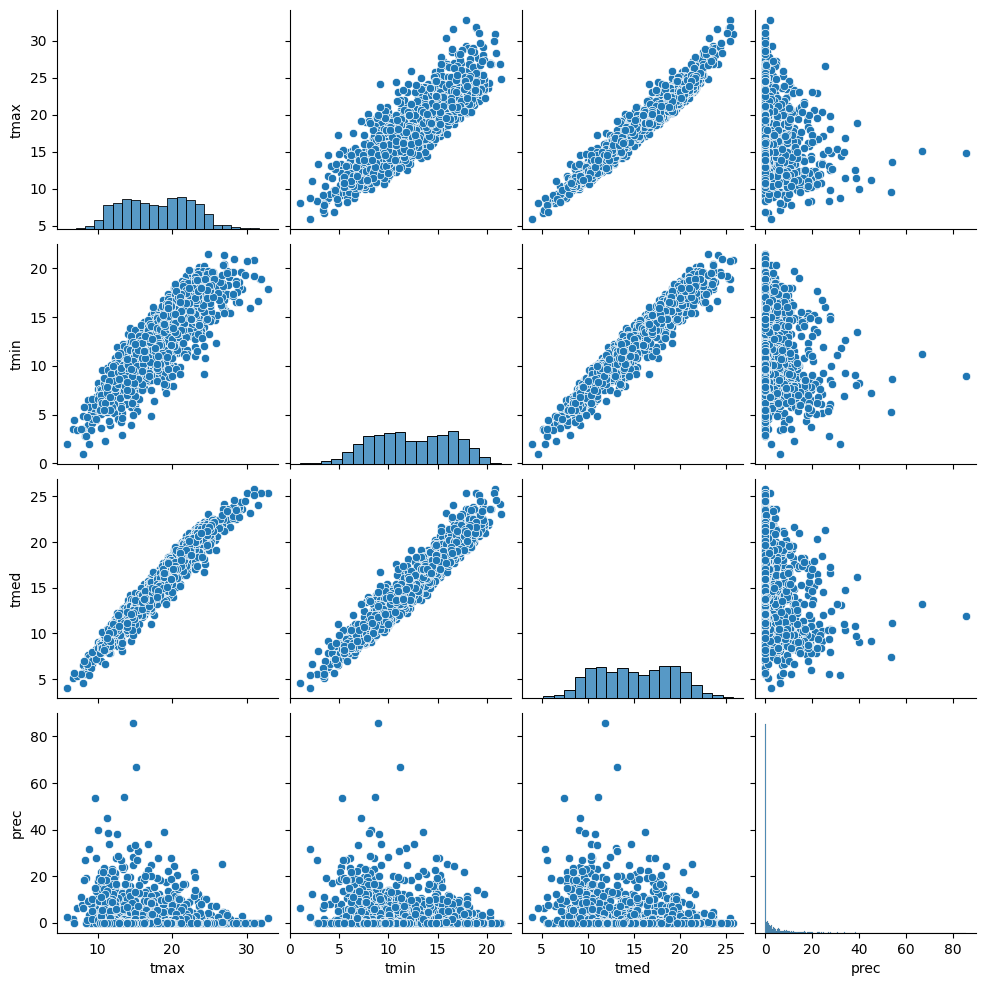

In [28]:
# Gráfico de líneas para la evolución de la temperatura máxima y mínima a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df['fecha'], df['tmax'], label='Temperatura Máxima', color='red')
plt.plot(df['fecha'], df['tmin'], label='Temperatura Mínima', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.title('Evolución de la Temperatura Máxima y Mínima')
plt.legend()
plt.show()

# Boxplot de la temperatura media
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['tmed'])
plt.title('Boxplot de la Temperatura Media')
plt.xlabel('Temperatura Media (°C)')
plt.show()

# Mapa de calor con la matriz de correlaciones entre variables climáticas relevantes
relevant_cols = ['tmax', 'tmin', 'tmed', 'prec', 'racha', 'sol', 'velmedia']
correlation_matrix = df[relevant_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Matriz de Correlaciones')
plt.show()

# Diagrama de dispersión (pairplot) entre al menos cuatro variables
sns.pairplot(df[['tmax', 'tmin', 'tmed', 'prec']])
plt.show()
